# Movie Recommendation System

## Dataset:
> This dataset downloaded from kaggle.com website https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv


## Import tools

In [61]:
# Necessary libraries
import pandas as pd
import numpy as np

In [107]:
# Import both of datasets and get their a brief of information
movies = pd.read_csv("data/tmdb_5000_movies.csv")
credits = pd.read_csv("data/tmdb_5000_credits.csv")

print("Mevies: columns:{}, rows: {}".format(movies.shape[0], movies.shape[1]))
print("Credits: columns:{}, rows: {}".format(credits.shape[0], credits.shape[1]))

Mevies: columns:4803, rows: 20
Credits: columns:4803, rows: 4


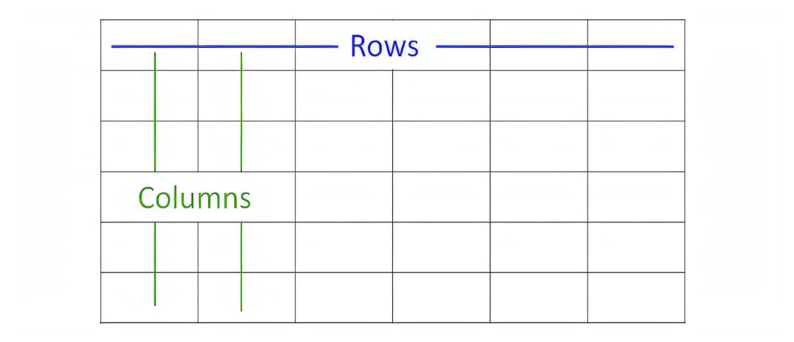

In [108]:
# Rows and Columns
import matplotlib.pyplot as plt
import cv2 as cv
plt.figure(figsize=(10,6))
img = cv.imread("row-column.jpg")
plt.axis("off")
plt.imshow(img);

In [109]:
# Get first  data from movies
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [110]:
# Get first 5 data from credits
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [111]:
# Now we need merge both of dataset on 'title' column  , let's do this

movies = movies.merge(credits, on="title")
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [112]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

## Get Some Visual forms for dataset

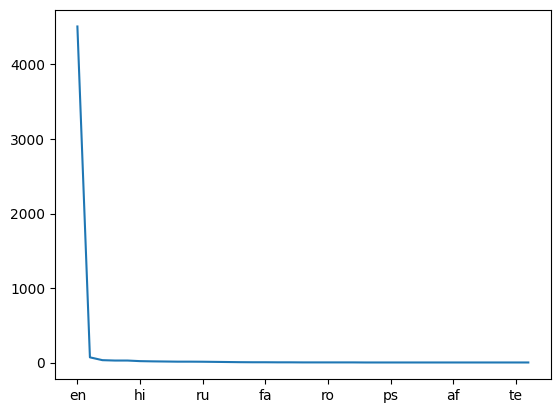

In [113]:
# original_language
# We can see that almost more then 90% movies in English language
movies["original_language"].value_counts().plot(kind="line");

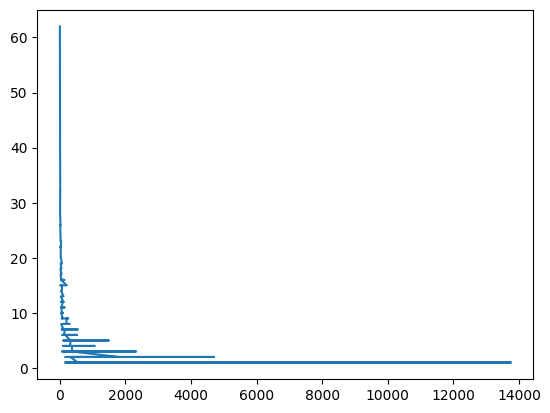

In [114]:
movies["vote_count"].value_counts(ascending=False).plot();

In [115]:
# Select multiple columns for recommendation system
# 1.Genres, 2.id, 3.keywords, 4.title, 5.overview, 6.cast, 7.crew

movies[["genres", "id", "keywords", "title", "overview", "cast", "crew"]]

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,[],126186,[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [116]:
# New dataset
movies = movies[["genres", "id", "keywords", "title", "overview", "cast", "crew"]]
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## Checking null-missing values

This section in very important part. If we have missing values and we try to fit the data into model we get troubly error. Almost all Machine Learning algorithms do not work with missing values.

1. We can drop missing values
2. Or Filling them with any values


In [117]:
# Missing values
movies.isna().sum()

genres      0
id          0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [118]:
# Overview section has missing values, And this is not much more. We can drop this rows easly
movies.dropna(subset="overview", inplace=True)

In [119]:
movies.isna().sum()

genres      0
id          0
keywords    0
title       0
overview    0
cast        0
crew        0
dtype: int64

In [120]:
# Some dataset has duplicated data. Let's check our data has or not
movies.duplicated().sum()

0

In [121]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [122]:
# Create a function for convert data
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    return L

In [123]:
convert('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [124]:
movies["genres"] = movies["genres"].apply(convert)

In [125]:
movies["keywords"] = movies["keywords"].apply(convert)

In [126]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [127]:
# Create another converter
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i["name"])
            counter += 1
        else:
            break
    return L

In [128]:
movies["cast"] = movies["cast"].apply(convert3)

In [129]:
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [131]:
# Create a function for fetch Director
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i["job"] == "Director":
            L.append(i["name"])
            break
    return L

movies["crew"].apply(fetch_director)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

In [132]:
movies["crew"] = movies["crew"].apply(fetch_director)

In [133]:
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [135]:
movies["overview"] = movies["overview"].apply(lambda X: X.split())

In [137]:
movies["genres"] = movies["genres"].apply(lambda X: [i.replace(" ", "") for i in X])
movies["keywords"] = movies["keywords"].apply(lambda X: [i.replace(" ", "") for i in X])
movies["cast"] = movies["cast"].apply(lambda X: [i.replace(" ", "") for i in X])
movies["crew"] = movies["crew"].apply(lambda X: [i.replace(" ", "") for i in X])

In [138]:
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [149]:
# Create new row under name "Tag" with pretrained data rows
movies["tags"] = movies["overview"] + movies["genres"] + movies["keywords"] + movies["cast"] + movies["crew"]

In [150]:
movies["tags"]

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4806, dtype: object

In [153]:
# Create new DataFrame
new_data = movies[["id", "title", "tags"]]

In [155]:
new_data.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [157]:
# Lets unlist tags values
new_data["tags"] = new_data["tags"].apply(lambda X: " ".join(X))

C:\Users\User\AppData\Local\Temp\ipykernel_7276\281267790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["tags"] = new_data["tags"].apply(lambda X: " ".join(X))


In [159]:
new_data

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [160]:
new_data["tags"][1]

"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems. Adventure Fantasy Action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger JohnnyDepp OrlandoBloom KeiraKnightley GoreVerbinski"

In [161]:
new_data["tags"] = new_data["tags"].apply(lambda X: X.lower())

C:\Users\User\AppData\Local\Temp\ipykernel_7276\1597398958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["tags"] = new_data["tags"].apply(lambda X: X.lower())


In [162]:
new_data.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


#### Now our data is ready

## Create Voctors

In [163]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words="english")

In [167]:
vectors = cv.fit_transform(new_data["tags"]).toarray()

In [168]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [173]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 835.0 kB/s eta 0:00:00
     ------------------------------------ 267.7/267.7 kB 916.2 kB/s eta 0:00:00


In [174]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [177]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [179]:
new_data["tags"] = new_data["tags"].apply(stem)

C:\Users\User\AppData\Local\Temp\ipykernel_7276\2143566048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["tags"] = new_data["tags"].apply(stem)


In [181]:
new_data.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [183]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(vectors).shape

(4806, 4806)

In [193]:
similarity = cosine_similarity(vectors)
similarity[0]

array([1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
       0.        ])

In [200]:
movie_list = sorted(list(enumerate(similarity[0])), reverse=True, key=lambda X: X[1])[1:6]

In [201]:
movie_list

[(539, 0.26089696604360174),
 (1194, 0.2581988897471611),
 (507, 0.25302403842552984),
 (260, 0.25110592822973776),
 (1216, 0.24944382578492943)]

In [207]:
# Create a function for recommendation
def recommend(movie):
    movie_index = new_data[new_data["title"] == movie].index[0]
    distances = similarity[movie_index]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda X: X[1])[1:6]
    
    for i in movie_list:
        print(new_data.iloc[i[0]].title)

In [214]:
recommend("The Dark Knight")

The Dark Knight Rises
Batman Begins
Batman Returns
Batman Forever
Batman & Robin


In [215]:
import pickle

In [218]:
pickle.dump(new_data.to_dict(), open('movies.pkl', 'wb'))

In [219]:
pickle.dump(similarity, open("similarity.pkl", 'wb'))